**Imports Library**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

**Prepare the Data**

In [ ]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = 'float')
y = []
for i in range(len(x)):
  t = 2*x[i] - 1
  y.append(t)

In [ ]:
x.shape

(6,)

In [ ]:
y = np.array(y)
y

array([-3., -1.,  1.,  3.,  5.,  7.])

**Traing the model**

In [ ]:
#model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(x, y, epochs = 500, verbose = 0)

print(model.predict([10.0]))

[[18.983528]]


**Custom loss**

In [ ]:
def huber_loss(y_true, y_pred):
  threshold = 1
  error = y_true - y_pred
  is_small_error = tf.abs(error) <= threshold
  small_error_loss = tf.square(error) / 2
  big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))

  return tf.where(is_small_error, small_error_loss, big_error_loss)

**Custom loss with hyperparameter**

In [ ]:
def huber_loss_with_threshold(threshold):
  def huber_loss(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - (0.5 * threshold))

    return tf.where(is_small_error, small_error_loss, big_error_loss)
  return huber_loss   



In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss=huber_loss)
model.fit(x, y, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.71662]]


In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss= huber_loss_with_threshold(threshold = 1.2))
model.fit(x, y, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.594194]]


**Implement Custom Loss as a Class**

We can also implement our custom loss as a class. It inherits from the Keras Loss class and the syntax and required methods are shown below.

In [ ]:
from tensorflow.keras.losses import Loss

class MyHuberLoss(Loss):
  # initialize instance attributes
  def __init__(self, threshold=1):
    super().__init__()
    self.threshold = threshold

    # compute loss
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= self.threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
    return tf.where(is_small_error, small_error_loss, big_error_loss)

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss= MyHuberLoss(threshold = 1.02))
model.fit(x, y, epochs=500,verbose=0)
print(model.predict([10.0]))

[[18.82561]]


# **Lambda Layer**

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Lambda(lambda x: tf.abs(x)), 
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#model.fit(x_train, y_train, epochs = 50)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 2.3710 - accuracy: 0.1060


[2.3710131645202637, 0.10599999874830246]

In [ ]:
from tensorflow.keras import backend as k
def Relu(x):
  return k.maximum(0.0, x)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Lambda(Relu),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#model.fit(x_train, y_train, epochs = 50)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3770 - accuracy: 0.0877


[2.3769710063934326, 0.0877000018954277]

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# inherit from this base class
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):

    def __init__(self, units=32):
        '''Initializes the instance attributes'''
        super(SimpleDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        '''Create the state of the layer (weights)'''
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)

    def call(self, inputs):
        '''Defines the computation from inputs to outputs'''
        return tf.matmul(inputs, self.w) + self.b

In [ ]:
# declare an instance of the class
my_dense = SimpleDense(units=1)

# define an input and feed into the layer
x = tf.ones((2, 1))
y = my_dense(x)
# parameters of the base Layer class like `variables` can be used
print(my_dense.variables)

[<tf.Variable 'simple_dense_9/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.00680888]], dtype=float32)>, <tf.Variable 'simple_dense_9/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [ ]:
# define the dataset
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# use the Sequential API to build a model with our custom layer
my_layer = SimpleDense(units=1)
model = tf.keras.Sequential([my_layer])

# configure and train the model
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=500,verbose=0)

# perform inference
print(model.predict([10.0]))

# see the updated state of the variables
print(my_layer.variables)

ValueError: ignored

In [ ]:
class SimpleDense(Layer):

    # add an activation parameter
    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        
        # define the activation to get from the built-in activation layers in Keras
        self.activation = tf.keras.activations.get(activation)


    def build(self, input_shape):
        print(input_shape)
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",
            initial_value=w_init(shape=(input_shape[-1], self.units),
                                 dtype='float32'),
            trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",
            initial_value=b_init(shape=(self.units,), dtype='float32'),
            trainable=True)
        #super().build(input_shape)


    def call(self, inputs):
        
        # pass the computation to the activation layer
        return self.activation(tf.matmul(inputs, self.w) + self.b)

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    SimpleDense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

(None, 784)
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2981 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9793


[0.07239531725645065, 0.9793000221252441]

**Coding a Wide and Deep Model¶**

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

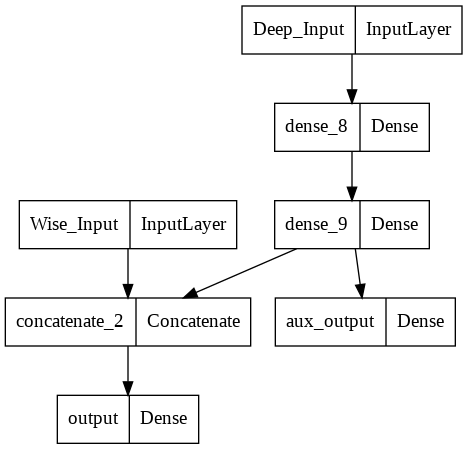

In [7]:
#define input

input_a = Input(shape=[1], name = "Wise_Input")
input_b = Input(shape=[1], name = "Deep_Input")

#define depth path

hidden_1 = Dense(30, activation = 'relu')(input_b)
hidden_2 = Dense(30, activation = 'relu')(hidden_1)

#define marge path

concat = concatenate([input_a, hidden_2])
output = Dense(1, name = 'output')(concat)

# define another output for deep path
aux_output = Dense(1, name= "aux_output")(hidden_2)
# build the model
model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])

# visualize the architecture
plot_model(model)


**Implement as a Class**

In [8]:
class WideAndDeepModel(Model):
  def __init__(self, units =30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden_1 = Dense(units, activation)
    self.hidden_1 = Dense(units, activation)
    self.main_out = Dense(1)
    self.aux_out = Dense(1)

  def call(self, inputs):
    '''defines the network architecture'''
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
        
    return main_output, aux_output  

In [9]:
# create an instance of the model
model = WideAndDeepModel()

**Ungraded Lab: Implementing ResNet**

In [15]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Layer

In [26]:
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters, kernel_size):
        super(IdentityBlock, self).__init__(name='')

        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()

        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()

        self.act = tf.keras.layers.Activation('relu')
        self.add = tf.keras.layers.Add()
    
    def call(self, input_tensor):
        x = self.conv1(input_tensor)
        x = self.bn1(x)
        x = self.act(x)

        x = self.conv2(x)
        x = self.bn2(x)

        x = self.add([x, input_tensor])
        x = self.act(x)
        return x

In [27]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.act = tf.keras.layers.Activation('relu')
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))

        # Use the Identity blocks that you just defined
        self.id1a = IdentityBlock(64, 3)
        self.id1b = IdentityBlock(64, 3)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.act(x)
        x = self.max_pool(x)

        # insert the identity blocks in the middle of the network
        x = self.id1a(x)
        x = self.id1b(x)

        x = self.global_pool(x)
        return self.classifier(x)

In [28]:
# utility function to normalize the images and return (image, label) pairs.
def preprocess(features):
    return tf.cast(features['image'], tf.float32) / 255., features['label']

# create a ResNet instance with 10 output units for MNIST
resnet = ResNet(10)
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# load and preprocess the dataset
dataset = tfds.load('mnist', split=tfds.Split.TRAIN, data_dir='./data')
dataset = dataset.map(preprocess).batch(32)

# train the model.
resnet.fit(dataset, epochs=1)

1875/1875 [==============================] - 261s 139ms/step - loss: 0.1268 - accuracy: 0.9662
